In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Context and Variable Details¶
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.
Our Goal is to predict wheather a person is diseased or not

Data Inspection


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [71]:
heartdf = pd.read_csv('Heart Disease Dataset.csv')
heartdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
heartdf.shape

(303, 14)

In [73]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [74]:
heartdf.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [75]:
heartdf.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [76]:
heartdf.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [77]:
num_cols = list(heartdf.columns[0:len(heartdf.columns)-1])
num_cols.remove('sex')

EDA

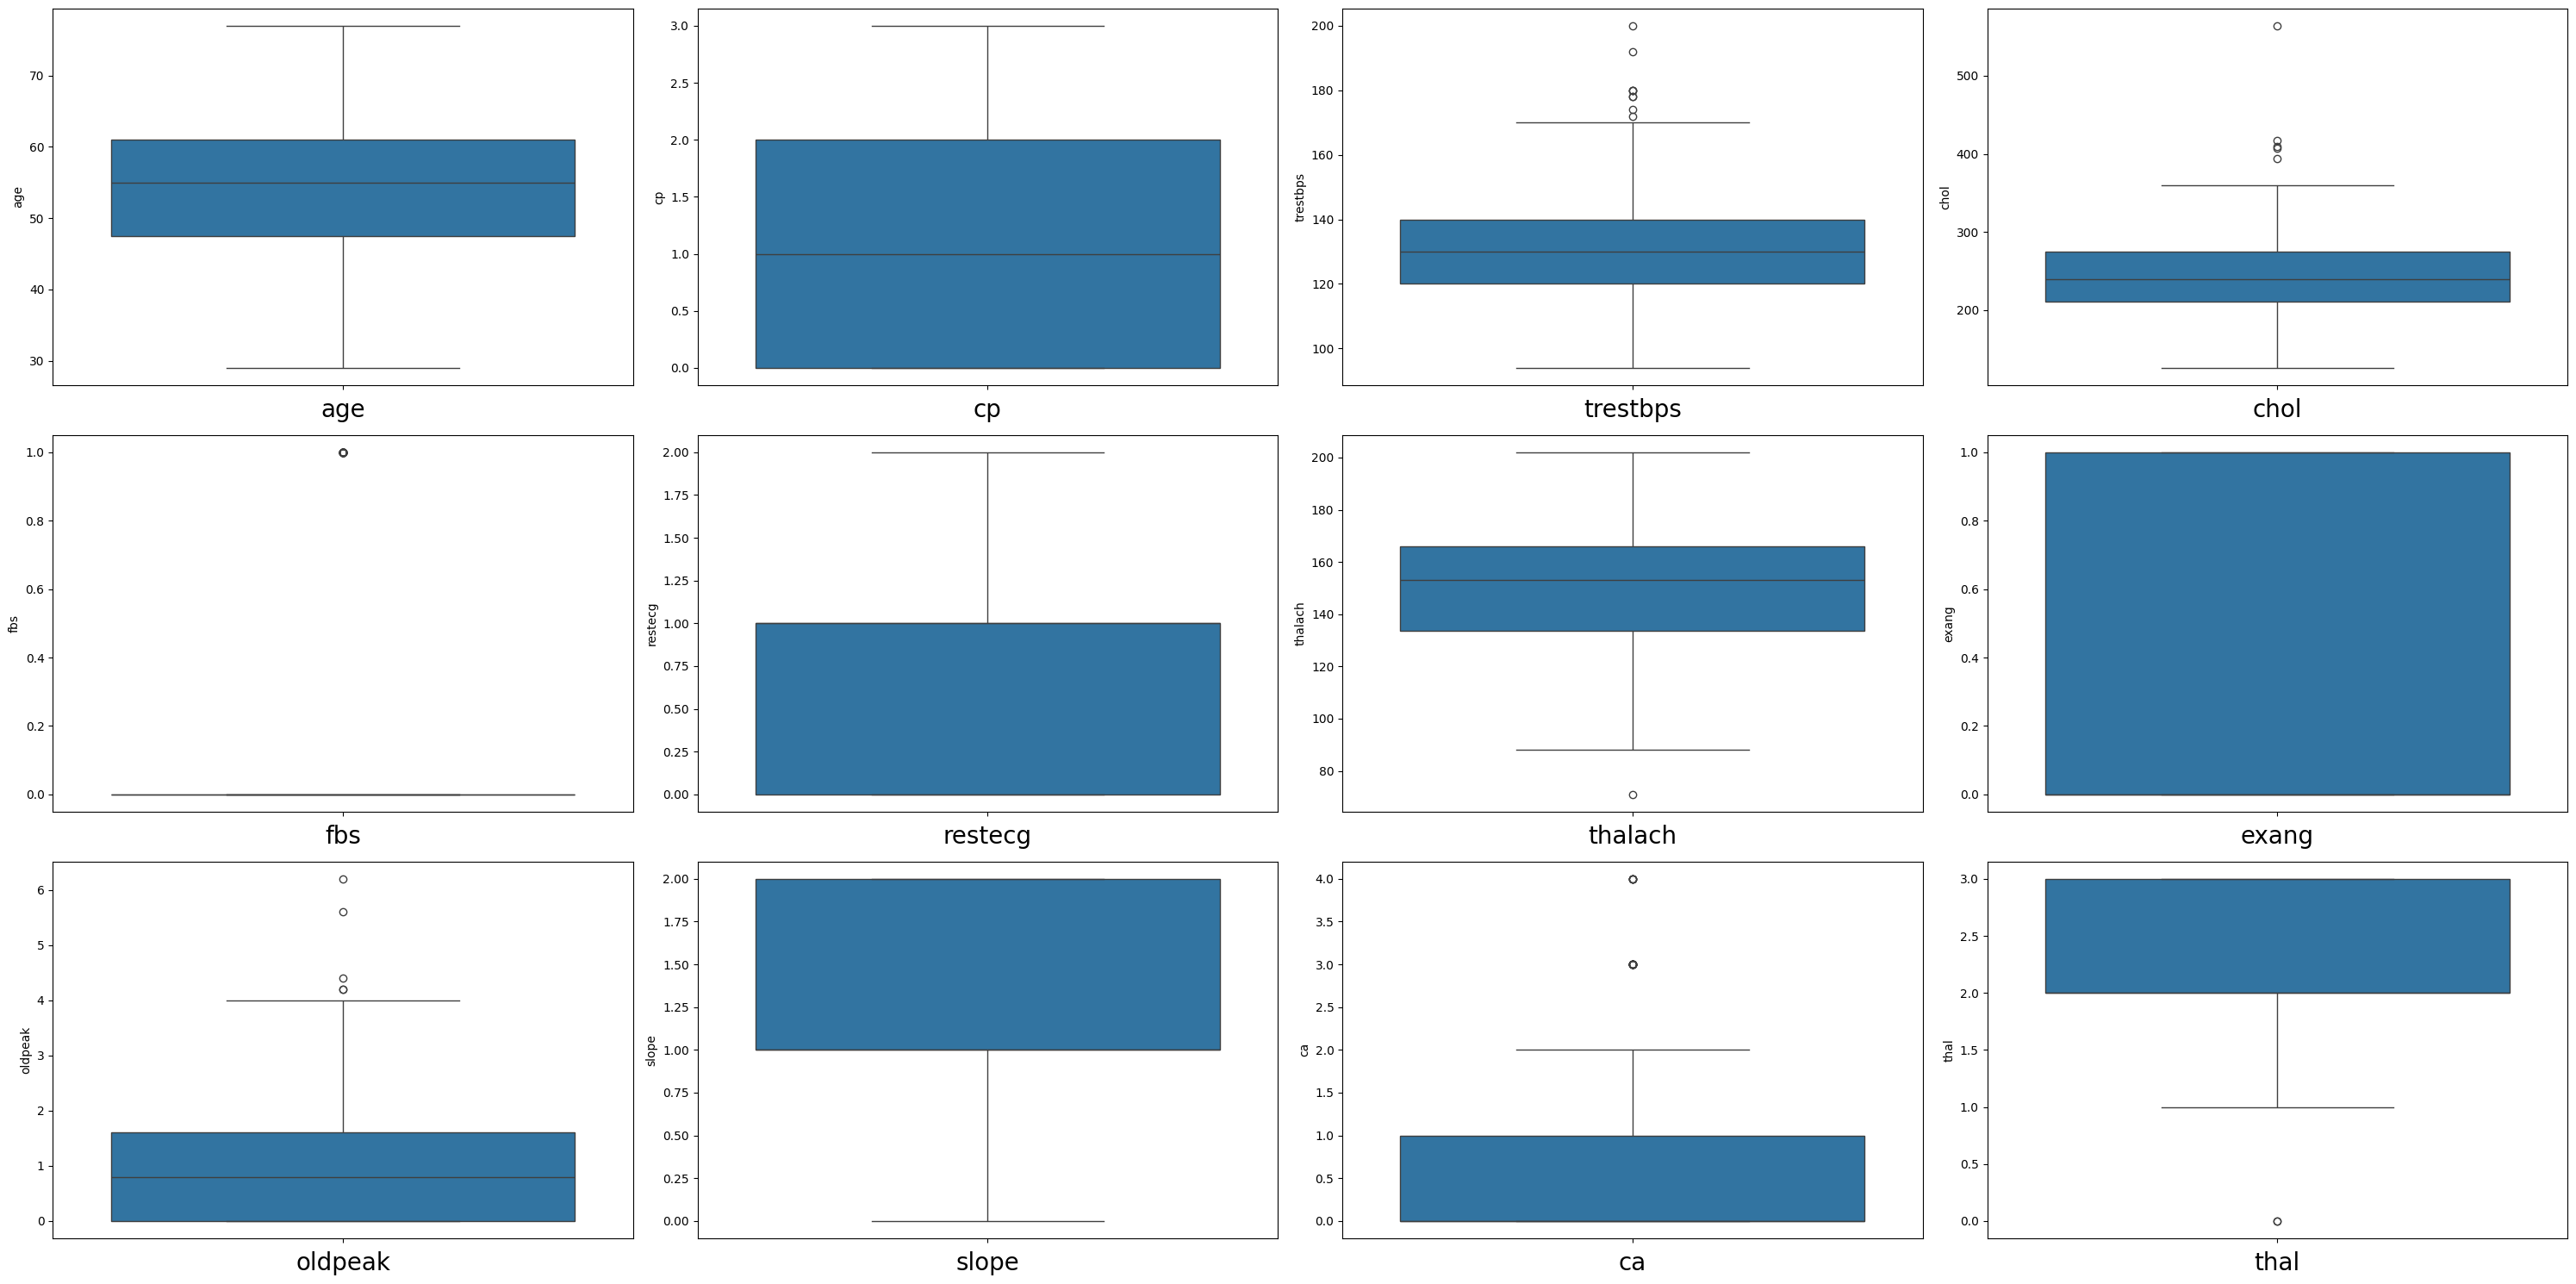

In [78]:
plt.figure(figsize=(30,15))
for i in enumerate(num_cols):
    plt.subplot(3,4,i[0]+1)
    ax = sns.boxplot(heartdf[i[1]])
    ax.set_xlabel(i[1],fontsize=20)

plt.tight_layout()
plt.show()

In [79]:
heartdf.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

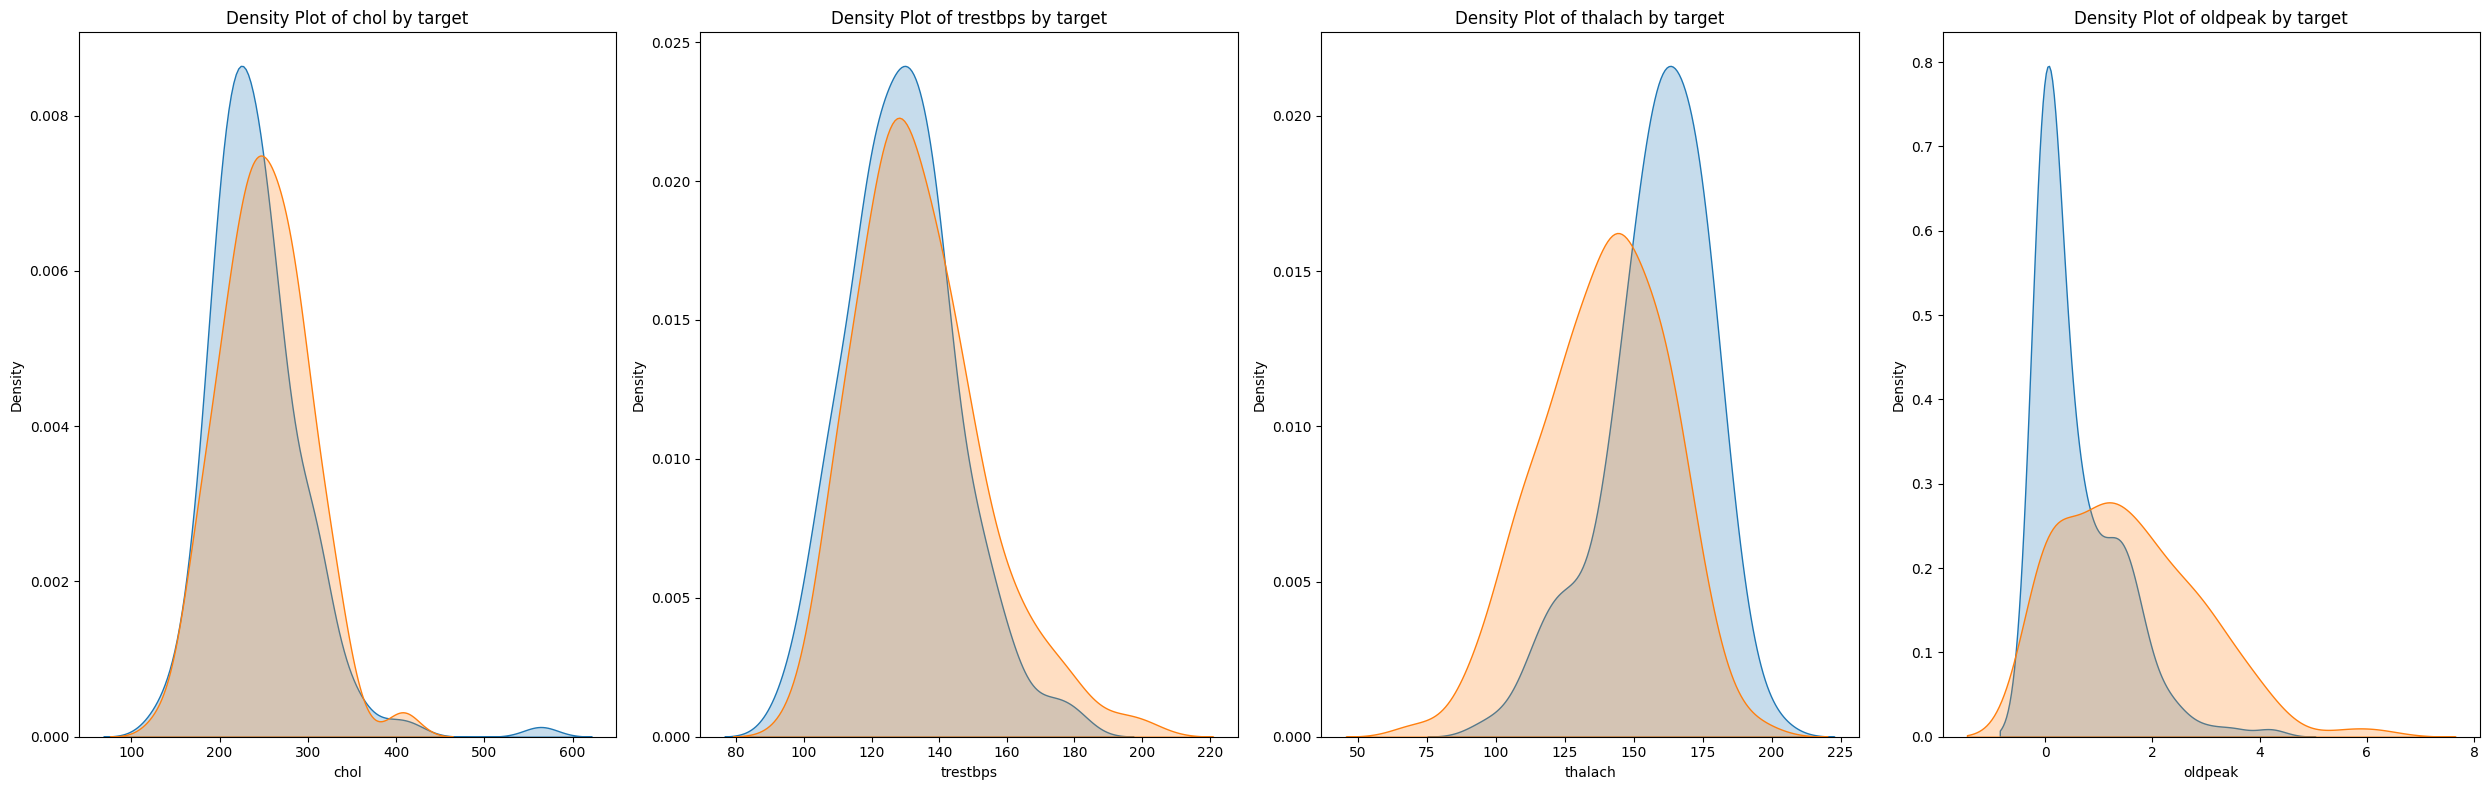

In [80]:
fig = plt.figure(figsize = (25, 8))


# ----------------------------------------------------------------------------------------------------
# plot the data
# the idea is to iterate over each class
# extract their data ad plot a sepate density plot
for i in heartdf["target"].unique():
    # extract the data
    x = heartdf[heartdf["target"] == i]["chol"]
    # plot the data using seaborn
    plt.subplot(1,4,1)
    sns.kdeplot(x, shade=True, label = "{} target".format(i))

# set the title of the plot
plt.title("Density Plot of chol by target")

# ----------------------------------------------------------------------------------------------------
# plot the data
# the idea is to iterate over each class
# extract their data ad plot a sepate density plot
for i in heartdf["target"].unique():
    # extract the data
    x = heartdf[heartdf["target"] == i]["trestbps"]
    # plot the data using seaborn
    plt.subplot(1,4,2)
    sns.kdeplot(x, shade=True, label = "{} target".format(i))

# set the title of the plot
plt.title("Density Plot of trestbps by target")
for i in heartdf["target"].unique():
    # extract the data
    x = heartdf[heartdf["target"] == i]["thalach"]
    # plot the data using seaborn
    plt.subplot(1,4,3)
    sns.kdeplot(x, shade=True, label = "{} target".format(i))

# set the title of the plot
plt.title("Density Plot of thalach by target")
for i in heartdf["target"].unique():
    # extract the data
    x = heartdf[heartdf["target"] == i]["oldpeak"]
    # plot the data using seaborn
    plt.subplot(1,4,4)
    sns.kdeplot(x, shade=True, label = "{} target".format(i))

# set the title of the plot
plt.title("Density Plot of oldpeak by target")

plt.tight_layout()
plt.show()


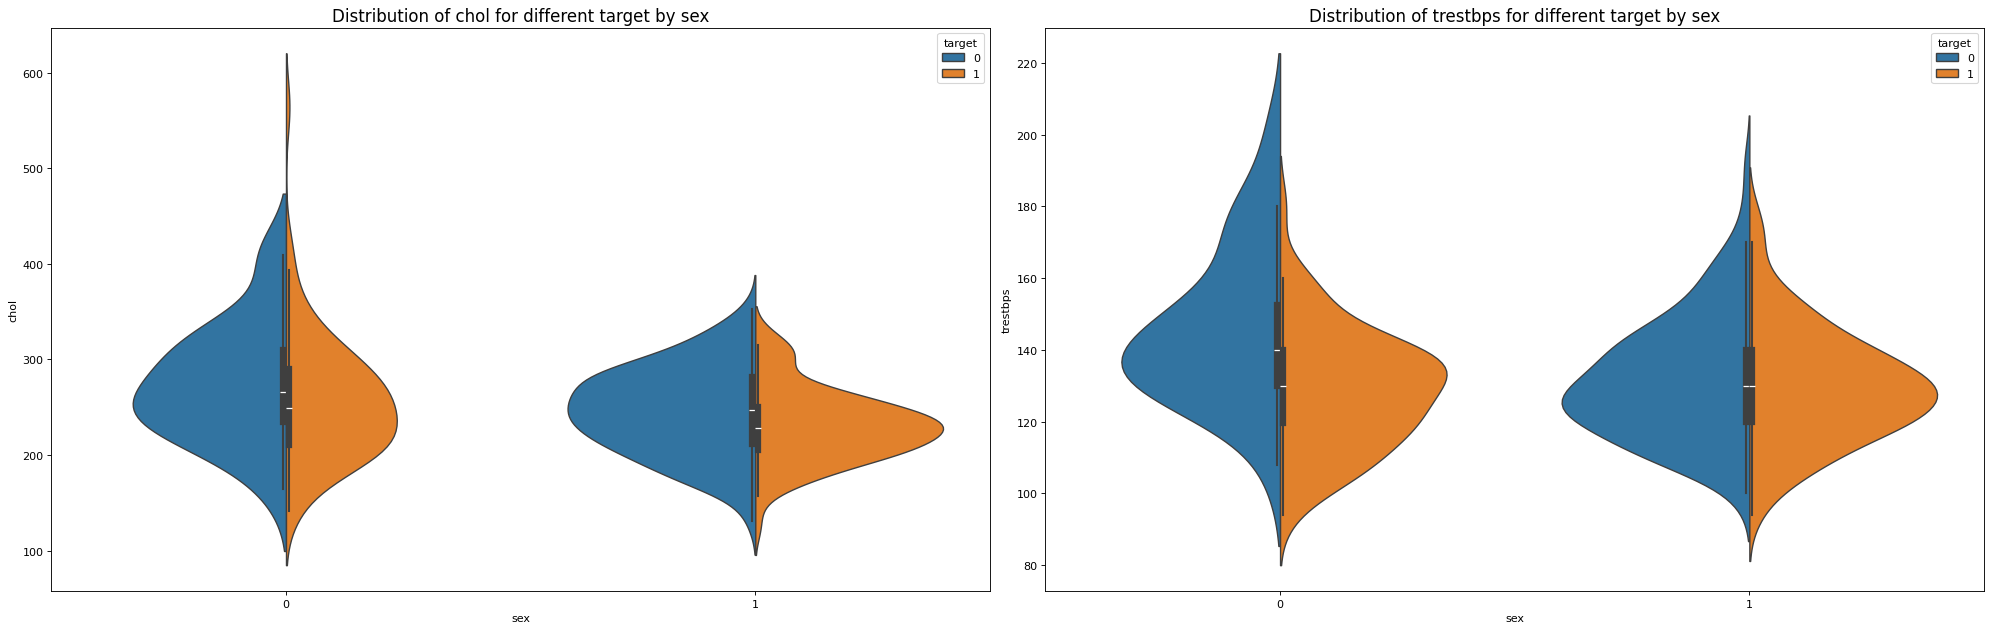

In [81]:
plt.figure(figsize=(25,8),dpi=80)
plt.subplot(1,2,1)
ax = sns.violinplot(x = "sex", y = "chol", hue = "target", split = True, data = heartdf)
ax.set_title('Distribution of chol for different target by sex', fontsize = 15)

plt.subplot(1,2,2)
ay = sns.violinplot(x = "sex", y = "trestbps", hue = "target", split = True, data = heartdf)
ay.set_title('Distribution of trestbps for different target by sex', fontsize = 15)

plt.tight_layout()
plt.show()

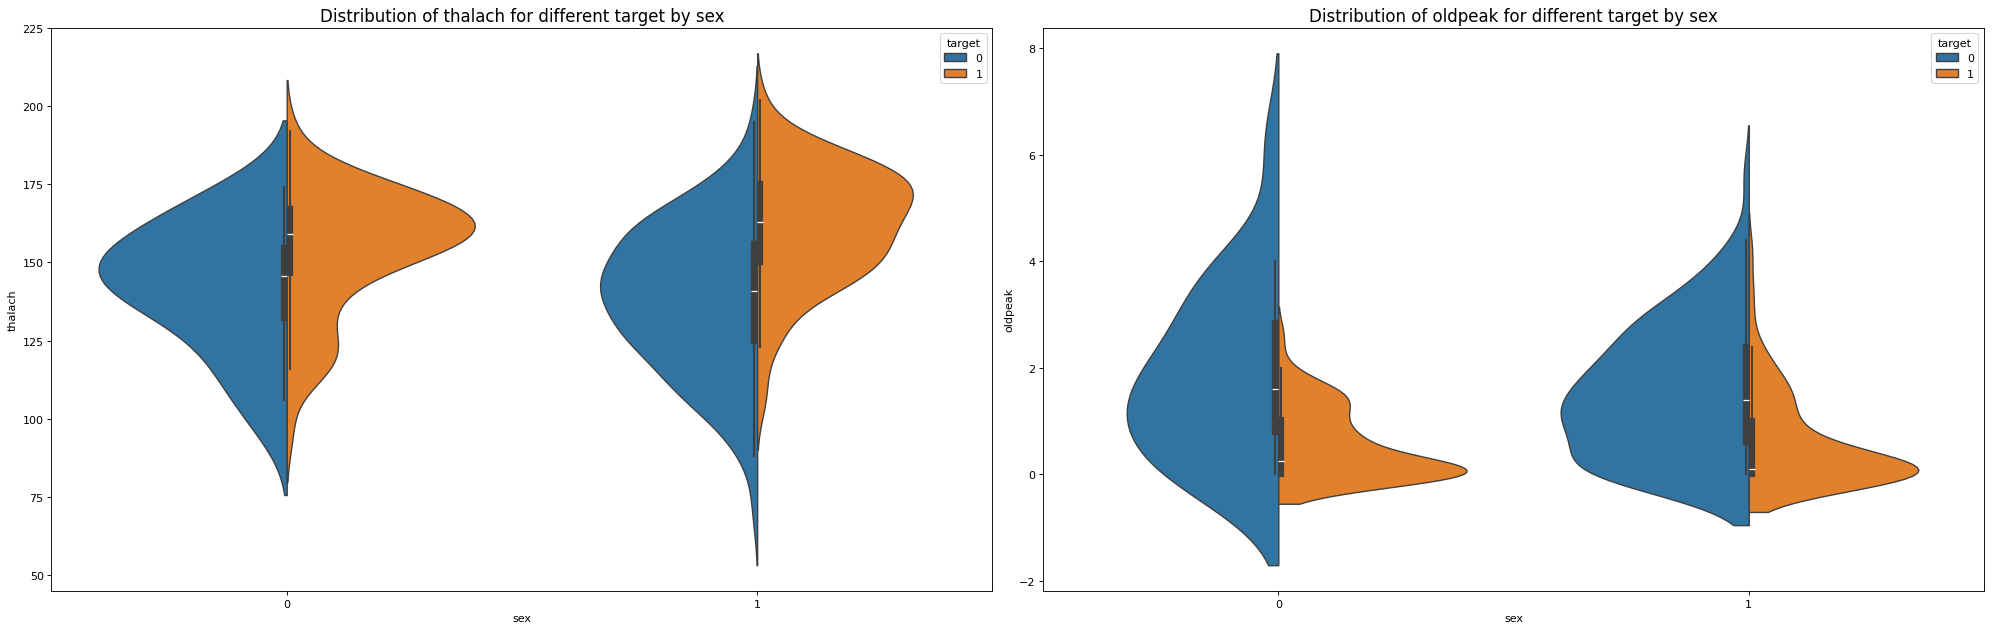

In [82]:
## plot the data based on different target to show the ditribution of thalach and oldpeak as per different sex


plt.figure(figsize=(25,8),dpi=80)
plt.subplot(1,2,1)
ax = sns.violinplot(x = "sex", y = "thalach", hue = "target", split = True, data = heartdf)
ax.set_title('Distribution of thalach for different target by sex', fontsize = 15)

plt.subplot(1,2,2)
ay = sns.violinplot(x = "sex", y = "oldpeak", hue = "target", split = True, data = heartdf)
ay.set_title('Distribution of oldpeak for different target by sex', fontsize = 15)

plt.tight_layout()
plt.show()

In [83]:
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

In [84]:
heart_des = heartdf[heartdf['target']==1]
heart_notdes = heartdf[heartdf['target']==0]

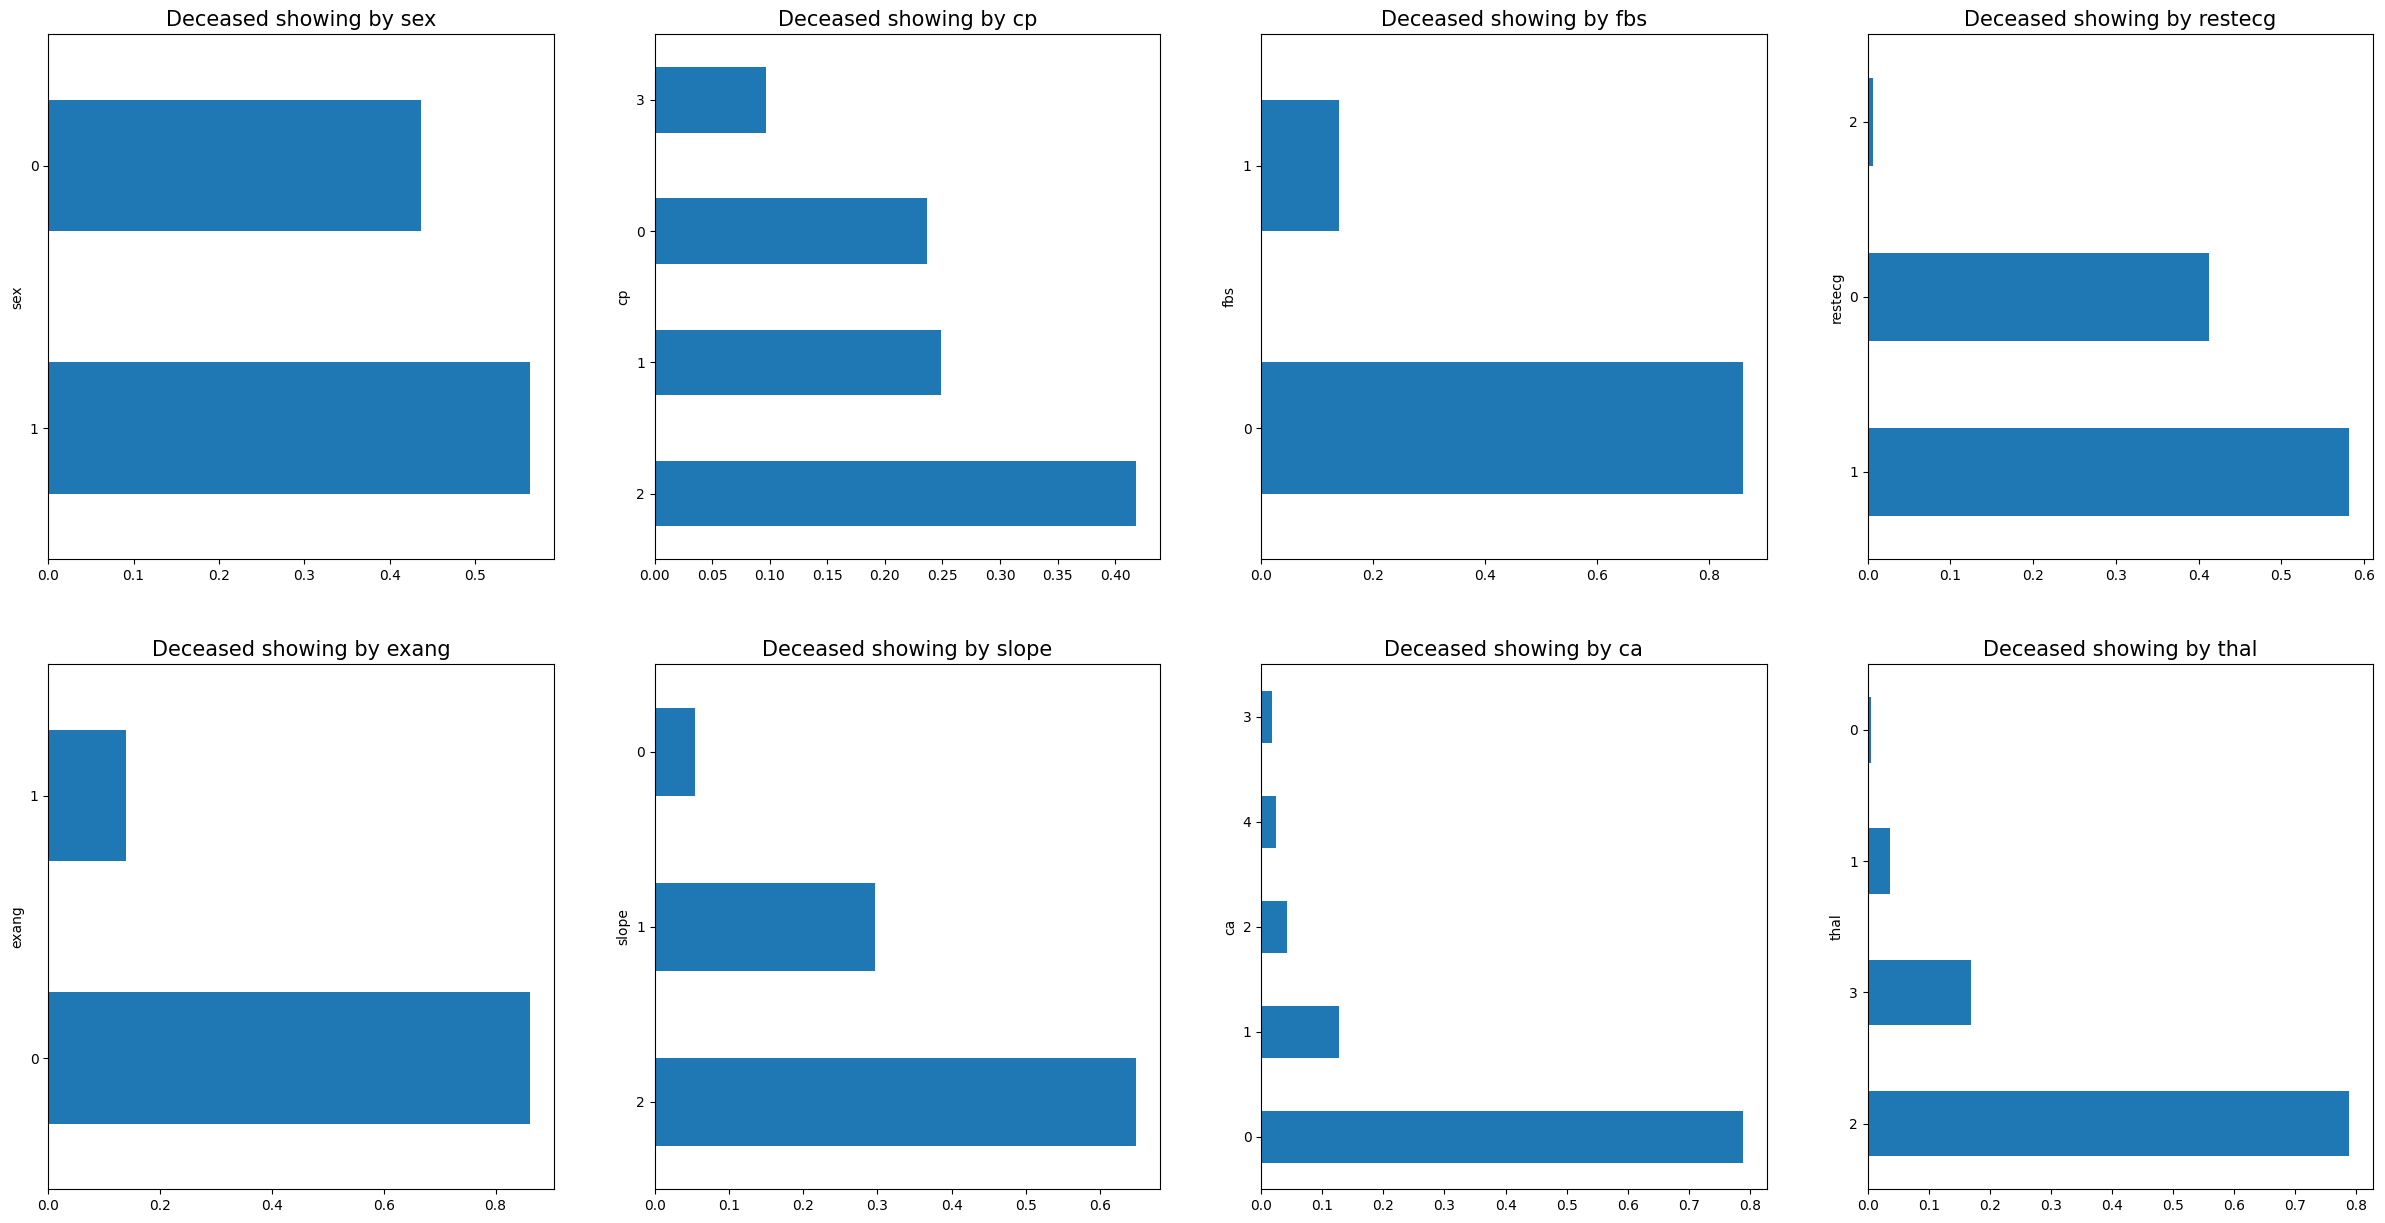

In [85]:
plt.figure(figsize=(30,15))
for i in enumerate(cat_cols):
    plt.subplot(2,4,i[0]+1)
    ax = heart_des[i[1]].value_counts(normalize=True).plot.barh()
    ax.set_title("Deceased showing by "+i[1],fontsize=15)
plt.show()

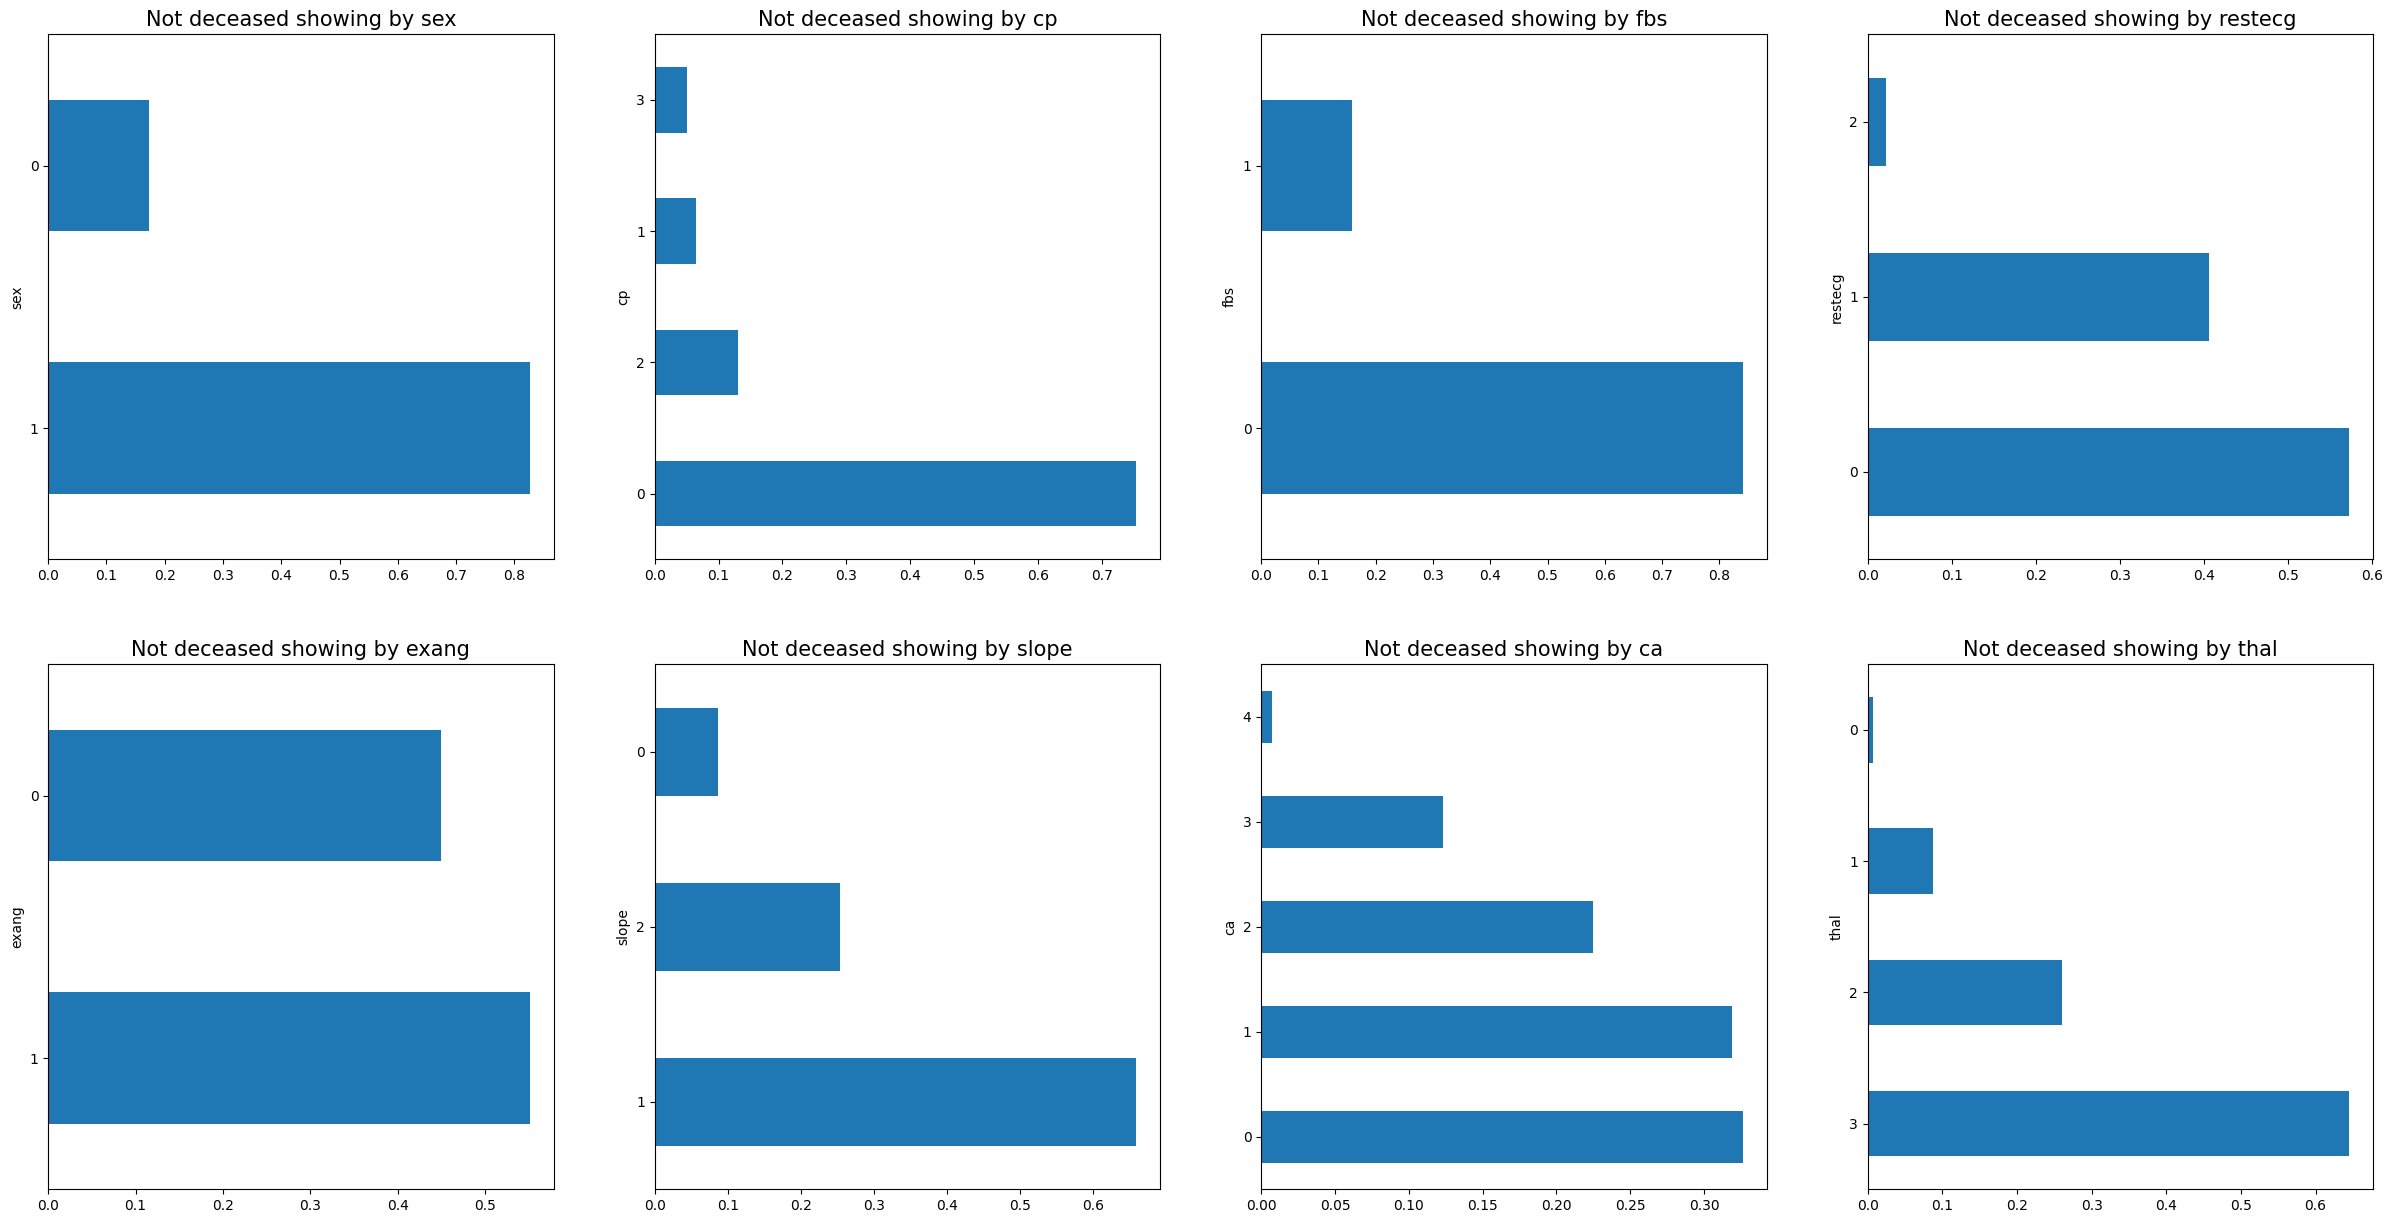

In [86]:
plt.figure(figsize=(30,15))
for i in enumerate(cat_cols):
    plt.subplot(2,4,i[0]+1)
    ax = heart_notdes[i[1]].value_counts(normalize=True).plot.barh()
    ax.set_title("Not deceased showing by "+i[1],fontsize=15)
plt.show()

In [87]:
df_train,df_test = train_test_split(heartdf,train_size=0.7,random_state=50)

In [88]:
y_train = df_train.pop('target')
X_train = df_train

In [89]:
y_test = df_test.pop('target')
X_test = df_test

In [90]:
## creat function for check train and test set
def check_model(dt):
    print("train confusion matrix : ",confusion_matrix(y_train,dt.predict(X_train)))
    print("train accuracy score : ",accuracy_score(y_train,dt.predict(X_train)))
    print("__"*50)
    print("test confusion matrix : ",confusion_matrix(y_test,dt.predict(X_test)))
    print("test accuracy score : ",accuracy_score(y_test,dt.predict(X_test)))

In [91]:
dt_default = DecisionTreeClassifier(random_state=0)
dt_res = dt_default.fit(X_train,y_train)

In [92]:
check_model(dt_res)

train confusion matrix :  [[ 99   0]
 [  0 113]]
train accuracy score :  1.0
____________________________________________________________________________________________________
test confusion matrix :  [[26 13]
 [ 9 43]]
test accuracy score :  0.7582417582417582


In [93]:

def tree_graph(dt):

    fig = plt.figure(figsize=(25,20))

    dt_plot = tree.plot_tree(dt,feature_names=X_train.columns,class_names=['Not Deceased','Deceased'],filled=True)

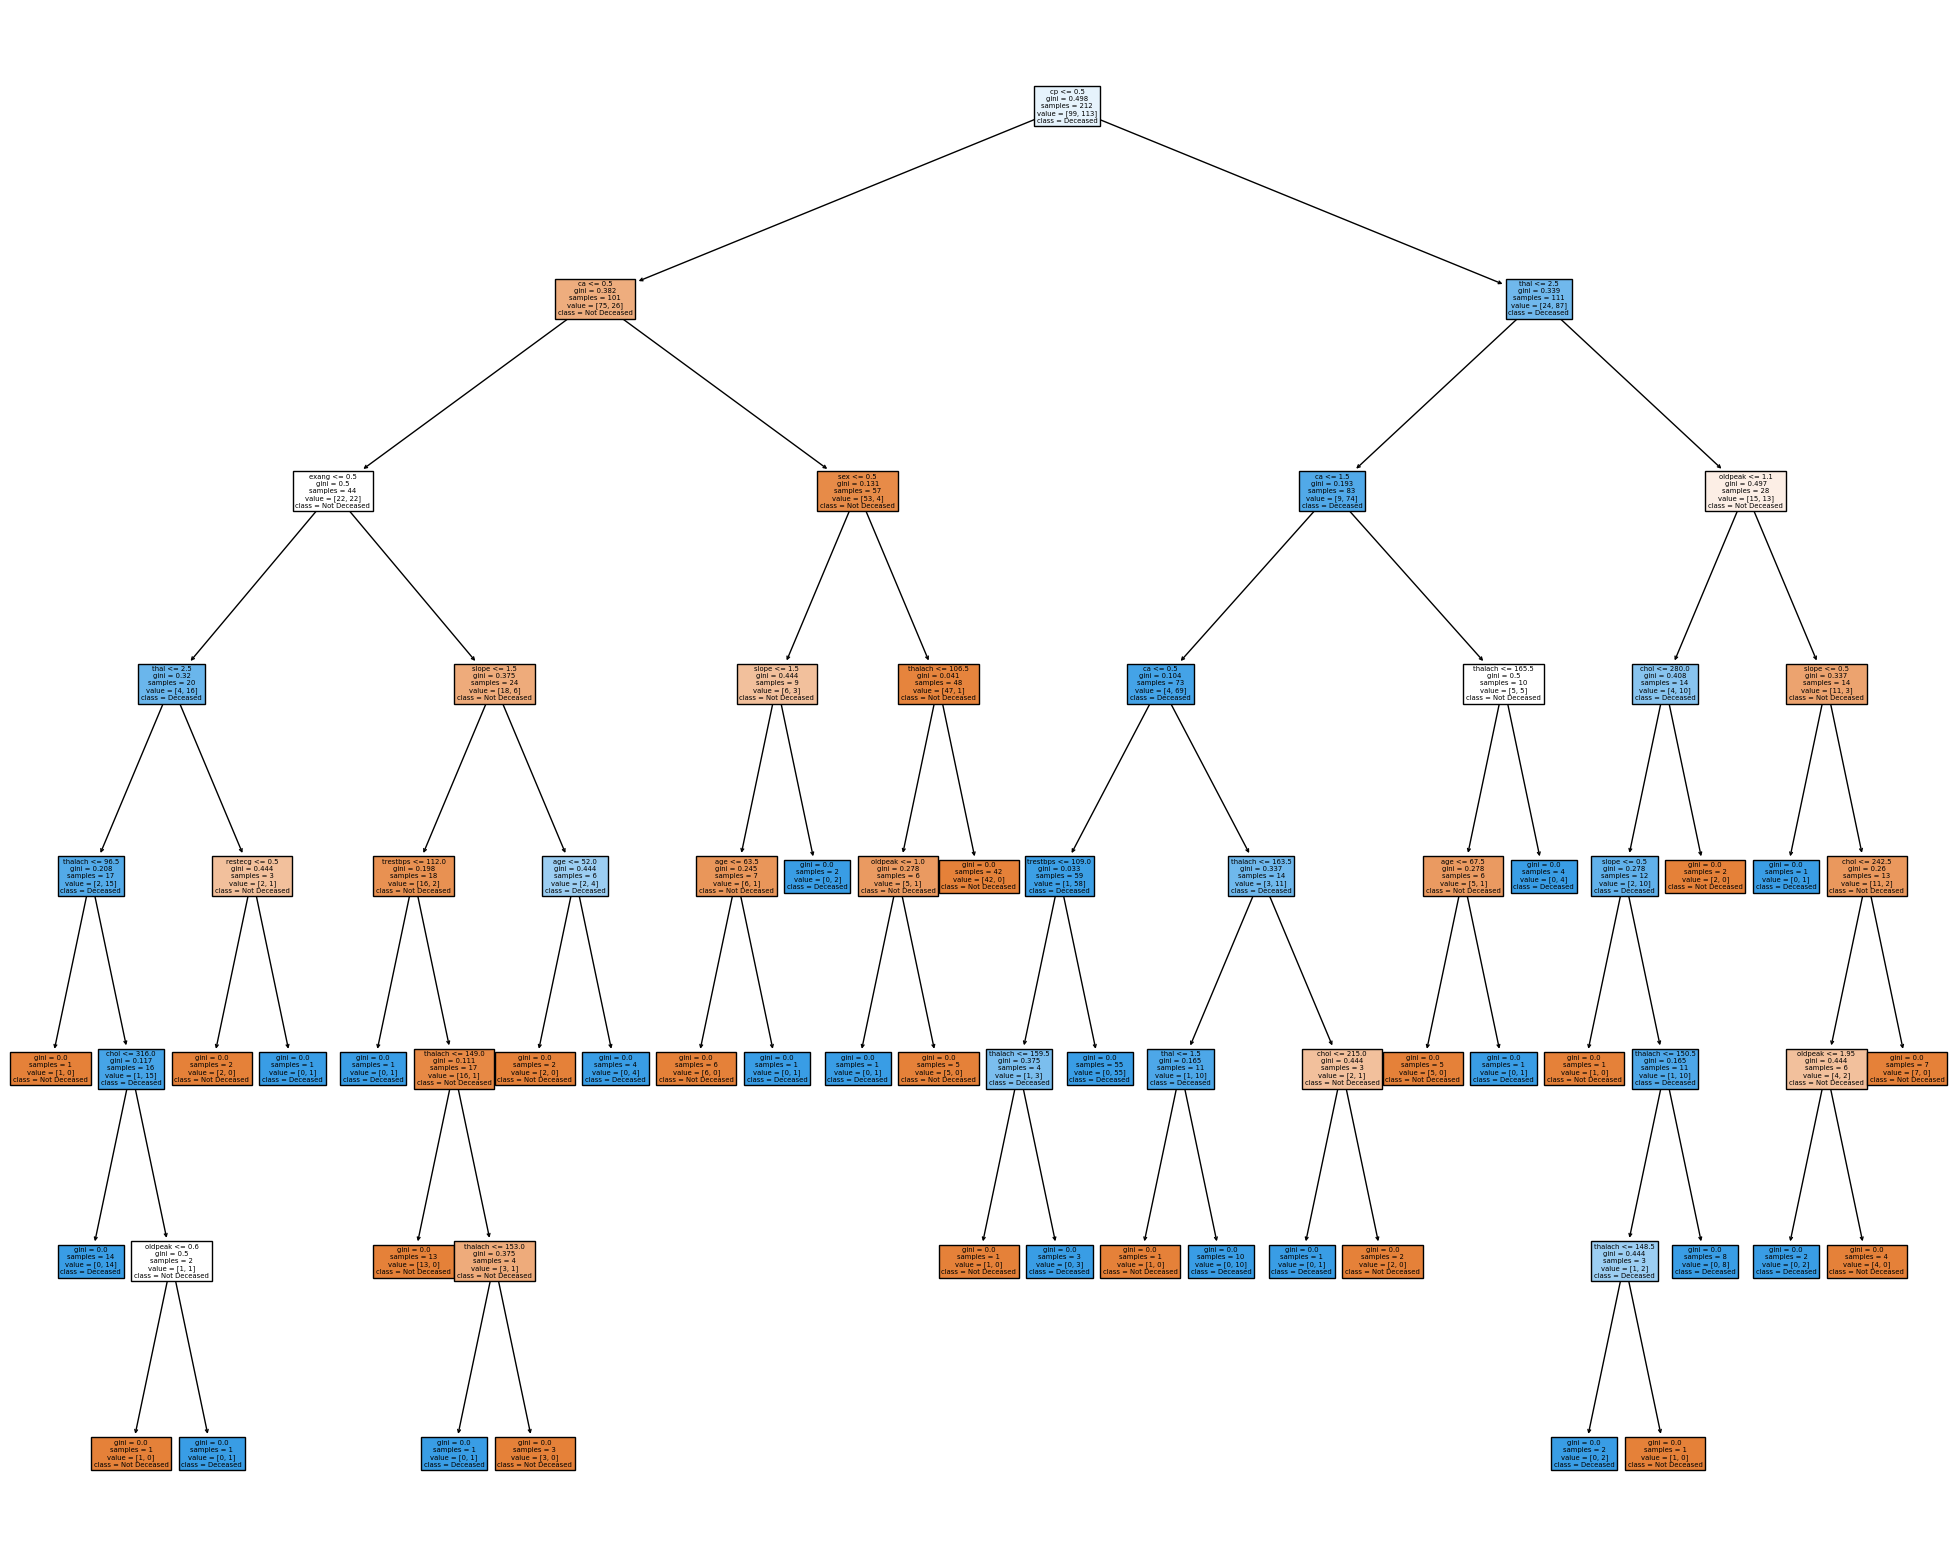

In [94]:
tree_graph(dt_res)

In [95]:
params = {'max_depth':[2,3,4,5,6,7,8,9,10],
          'min_samples_split':[5,10,25,50,75,100,150]}

In [96]:
grid_search = GridSearchCV(estimator=dt_default,param_grid=params,scoring='accuracy',n_jobs=-1,verbose=1) ## create grid search object

In [97]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [5, 10, 25, 50, 75, 100, 150]},
             scoring='accuracy', verbose=1)

In [98]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=0)

In [99]:
best_dt = grid_search.best_estimator_

In [100]:
check_model(best_dt)

train confusion matrix :  [[ 89  10]
 [ 10 103]]
train accuracy score :  0.9056603773584906
____________________________________________________________________________________________________
test confusion matrix :  [[28 11]
 [12 40]]
test accuracy score :  0.7472527472527473


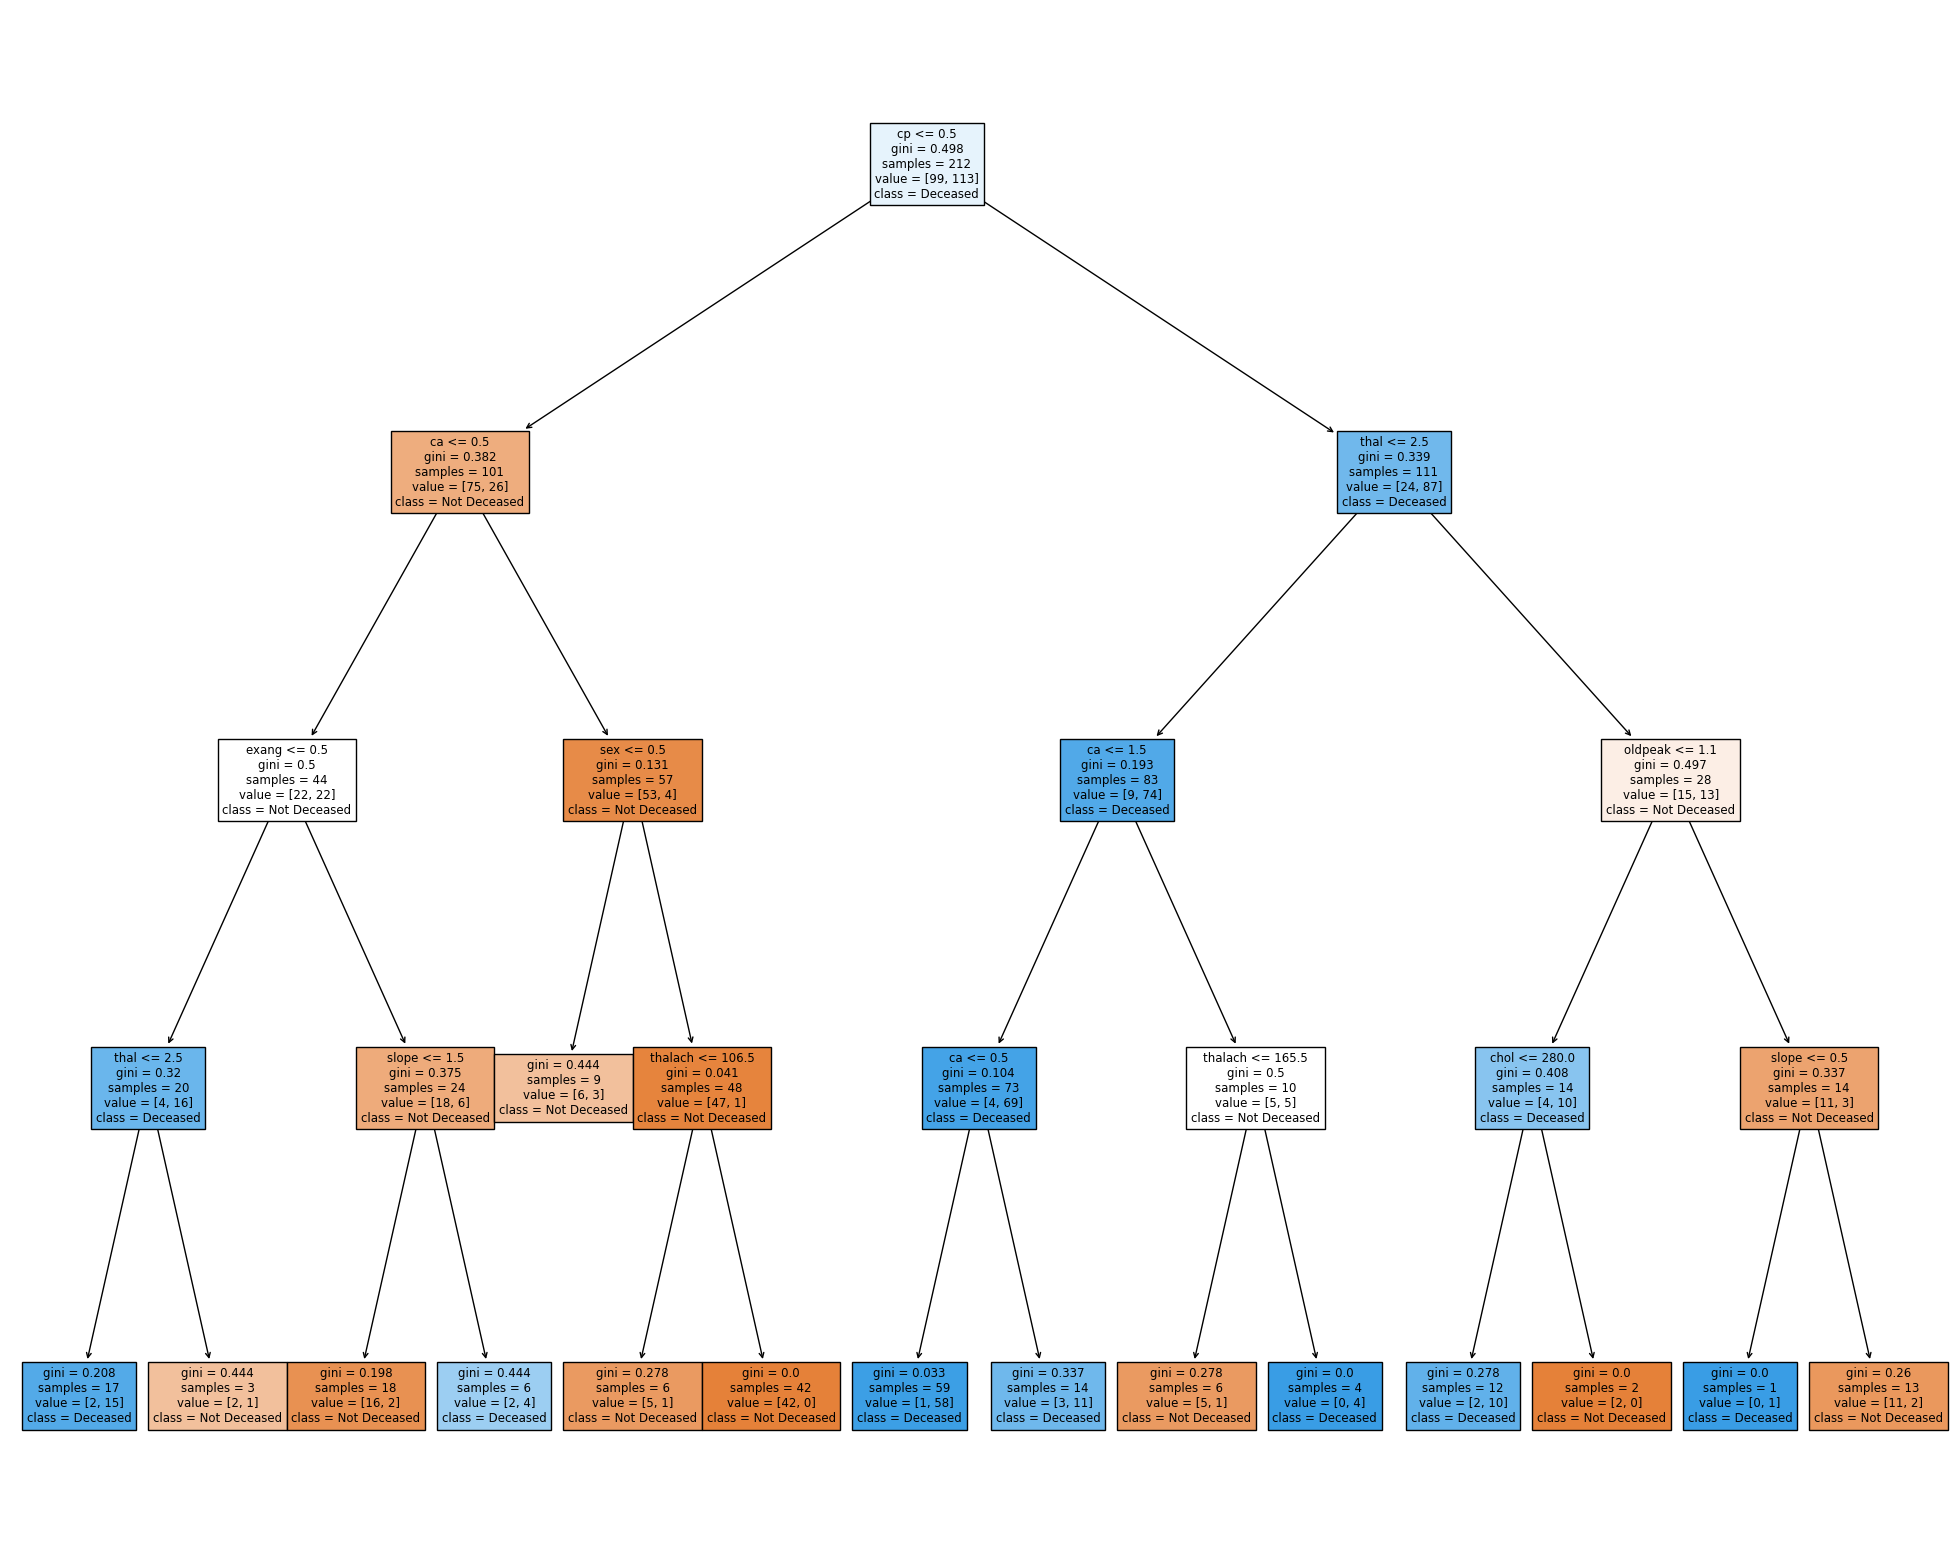

In [101]:
tree_graph(best_dt)